## Applied Signal and Image Processing

(Subhashish Nabajja, CS24010)


**Aim**: Write program to demonstrate the following aspects of signal on
sound/image data
1. Convolution operation
2. Template Matching

# Convolution Operation

Convolution is a mathematical operation used in signal processing and image processing. It involves combining two signals (or functions) to produce a third signal. The operation takes a kernel (small matrix or filter) and applies it to an input signal or image, transforming it by "sliding" the kernel over the signal.

### Key Points:
- **Kernel (Filter)**: A small matrix or vector that is applied to the input signal/image.
- **Sliding Window**: The kernel moves over the input signal/image, performing an operation (e.g., addition or multiplication) at each step.
- **Result**: The output signal/image is a transformed version of the input, based on the kernel used.

### Applications:
- **Image Processing**: Edge detection, blurring, sharpening, etc.
- **Signal Processing**: Filtering noise, smoothing signals, etc.
  
In the code, convolution is applied to sound data where a smoothing kernel is used to filter or modify the original sound signal.

---

# Template Matching

Template matching is a technique used in image processing to find a sub-image (template) inside a larger image. It involves sliding the template over the image (similar to convolution) and comparing the pixel values at each location. The goal is to find the region of the image that best matches the template.

### Key Points:
- **Template**: A smaller image that you want to find within a larger image.
- **Matching**: The template is moved over the image, and a similarity measure (such as correlation) is computed at each position.
- **Result**: The position of the best match is found, often represented by a rectangle drawn around the matching region.

### Applications:
- **Object Detection**: Detecting specific objects or patterns in an image.
- **Face Recognition**: Identifying faces in photographs.
- **Quality Control**: Checking if certain features are present in industrial images.

In the code, template matching is used to find a specified template inside an image and highlight the matched region by drawing a rectangle around it.


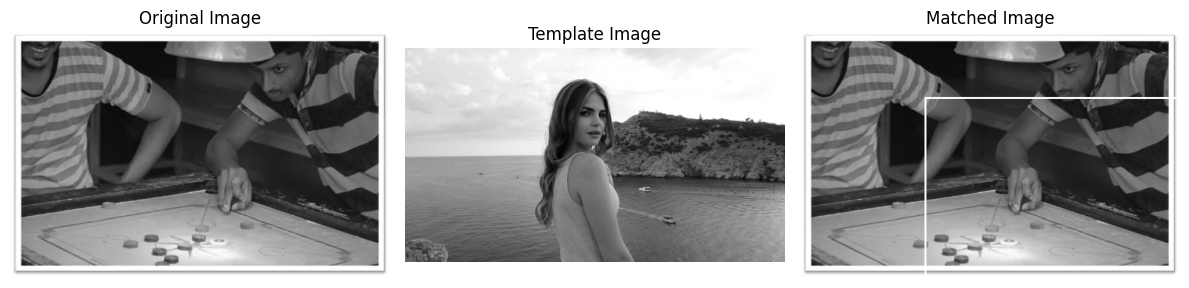

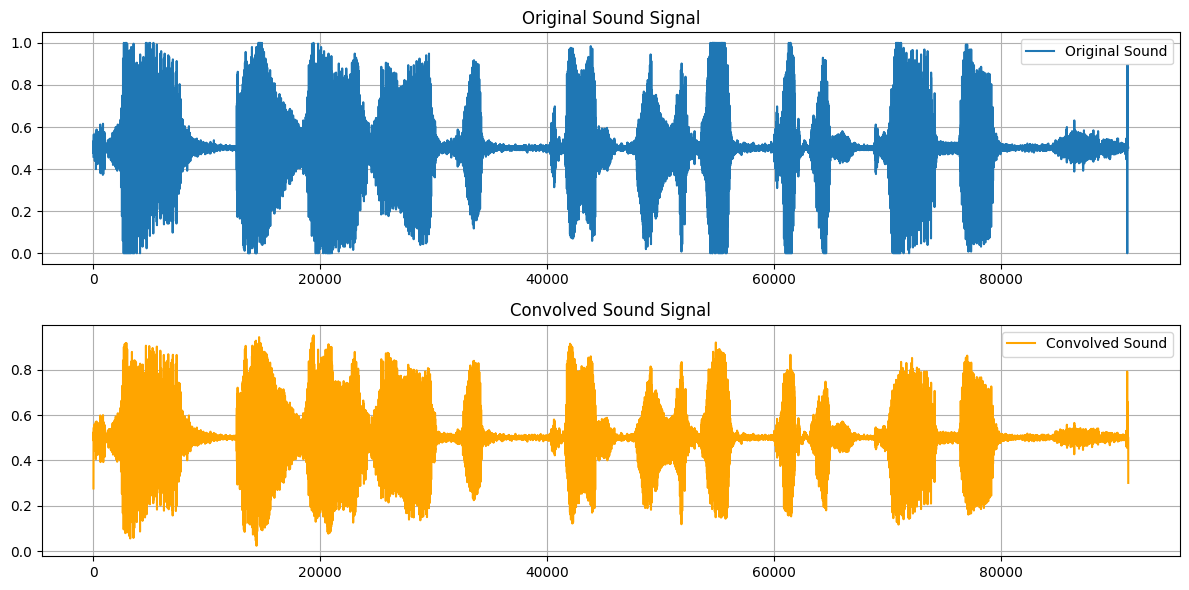

array([0.27686275, 0.37098039, 0.46666667, ..., 0.50196078, 0.40156863,
       0.30117647], shape=(91240,))

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import convolve

# Function to perform template matching on image data
def template_matching(image_path, template_path):
    try:
        # Load the image and the template
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
        
        # Check if the files were loaded correctly
        if image is None or template is None:
            raise FileNotFoundError("Image or template file not found.")
        
        # Perform template matching
        result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        
        # Extract the top-left corner of the matching area
        top_left = max_loc
        h, w = template.shape
        
        # Draw a rectangle around the matched region
        matched_image = image.copy()
        cv2.rectangle(matched_image, top_left, (top_left[0] + w, top_left[1] + h), 255, 2)
        
        # Plot the results
        plt.figure(figsize=(12, 6))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')
        
        # Template image
        plt.subplot(1, 3, 2)
        plt.imshow(template, cmap='gray')
        plt.title("Template Image")
        plt.axis('off')
        
        # Matched image with rectangle
        plt.subplot(1, 3, 3)
        plt.imshow(matched_image, cmap='gray')
        plt.title("Matched Image")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        # Return results for further processing if needed
        return result, top_left, (w, h)
    
    except Exception as e:
        print(f"An error occurred during template matching: {e}")
        return None

# Function to perform convolution on sound data
def sound_convolution(input_wav, kernel):
    try:
        # Read the sound file
        sample_rate, sound_data = wavfile.read(input_wav)
        
        # Handle multi-channel audio (use the first channel if stereo)
        if sound_data.ndim > 1:  # Stereo or multi-channel
            sound_data = sound_data[:, 0]  # Use the first channel
        
        # Check for file truncation or corruption
        if len(sound_data) == 0:
            raise ValueError("Sound file is empty or corrupted.")
        
        # Normalize sound data
        sound_data = sound_data / np.max(np.abs(sound_data))
        
        # Perform convolution
        convolved_data = convolve(sound_data, kernel, mode='same')
        
        # Plot original and convolved sound data
        plt.figure(figsize=(12, 6))
        
        # Plot original sound
        plt.subplot(2, 1, 1)
        plt.plot(sound_data, label="Original Sound")
        plt.title("Original Sound Signal")
        plt.grid()
        plt.legend()
        
        # Plot convolved sound
        plt.subplot(2, 1, 2)
        plt.plot(convolved_data, label="Convolved Sound", color='orange')
        plt.title("Convolved Sound Signal")
        plt.grid()
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Return the convolved data
        return convolved_data
    
    except Exception as e:
        print(f"An error occurred during sound convolution: {e}")
        return None

# Example Usage:

# 1. Template Matching
image_path = './assets/image-1.jpeg'  # Replace with the path to your image
template_path = './assets/image-2.jpg'  # Replace with the path to your template
template_matching(image_path, template_path)

# 2. Sound Convolution
input_wav = './assets/taunt.wav'  # Replace with the path to your WAV file
kernel = np.ones(5) / 5  # Example kernel for smoothing
sound_convolution(input_wav, kernel)